   # Heart Disease Prediction



In [1]:
import pandas as pd
import os
from  matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
df =pd.read_csv("cardio_train.csv",sep=";")
df.head(5)  ## 8 records are manually deleted as they are having -ve values

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69992 entries, 0 to 69991
Data columns (total 13 columns):
id             69992 non-null int64
age            69992 non-null int64
gender         69992 non-null int64
height         69992 non-null int64
weight         69992 non-null float64
ap_hi          69992 non-null int64
ap_lo          69992 non-null int64
cholesterol    69992 non-null int64
gluc           69992 non-null int64
smoke          69992 non-null int64
alco           69992 non-null int64
active         69992 non-null int64
cardio         69992 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Cleaning the Data

In [4]:
df.drop("id",axis=1,inplace=True)

In [5]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
print("There are {} duplicated values in data frame".format(df.duplicated().sum()))

There are 24 duplicated values in data frame


### We can drop these duplicates because they have no  effect on training of model

In [7]:
duplicated = df[df.duplicated(keep=False)]
duplicatedlist = duplicated.sort_values(by=['age', "gender", "height"], ascending= False)
duplicatedlist.head(6)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
45742,22077,1,175,69.0,120,80,1,1,0,0,1,1
1568,21945,1,165,60.0,120,80,1,1,0,0,1,0
48910,21945,1,165,60.0,120,80,1,1,0,0,1,0
40295,21943,1,165,65.0,120,80,1,1,0,0,1,1
52545,21943,1,165,65.0,120,80,1,1,0,0,1,1


In [8]:
df.drop_duplicates(inplace=True)
print("Now there are {} duplicated values are in the dataframe".format(df.duplicated().sum()))

Now there are 0 duplicated values are in the dataframe


In [9]:
# Checking for missing values
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df['cardio'].unique() ## Target variable is Binary 


array([0, 1], dtype=int64)

### Convert age from days to years


In [11]:
df['age'] =  df['age'] / 365.25

In [12]:
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69968.000000,69968.000000,69968.000000,69968.000000,69968.000000,69968.000000,69968.000000,69968.000000,69968.000000,69968.000000,69968.000000,69968.000000
mean,53.303089,1.349631,164.359307,74.209314,128.847044,96.640450,1.367011,1.226561,0.088169,0.053796,0.803725,0.499771
std,6.754853,0.476857,8.211515,14.397180,154.025612,188.514207,0.680355,0.572381,0.283542,0.225616,0.397182,0.500004
min,29.563313,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.363450,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.943874,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.390144,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.922656,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Removing Heights & Weights,that's fall below 2.5% or above 97.5% of a given range.


In [14]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) |(df['height'] < df['height'].quantile(0.025))].index,inplace=True)


In [15]:
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [16]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000,63835.000000
mean,53.313250,1.347881,164.498065,73.546836,128.844161,95.963719,1.359207,1.222762,0.086395,0.052902,0.803666,0.498285
std,6.740555,0.476302,6.863358,11.721721,161.007840,186.331094,0.674896,0.569019,0.280948,0.223840,0.397227,0.500001
min,29.563313,1.000000,150.000000,52.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.405202,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.949350,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.379192,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.922656,2.000000,180.000000,106.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [17]:


print("In dataset, Diastilic pressure 'ap_lo' is higher than systolic 'ap_hi'  in {0} records".format(df[df['ap_lo']> df['ap_hi']].shape[0]))


In dataset, Diastilic pressure 'ap_lo' is higher than systolic 'ap_hi'  in 1076 records


### Let's get rid of these 1076 records as we did for weights

In [18]:
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)


In [19]:
df.describe()

# We don't need any Normalisation as we have already eliminated by doing above steps

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000
mean,53.302291,1.347391,164.555234,73.428943,125.766920,81.045635,1.351051,1.220320,0.085629,0.051890,0.803653,0.488238
std,6.736930,0.476145,6.831413,11.616070,13.757056,8.239341,0.670117,0.567727,0.279818,0.221807,0.397237,0.499866
min,29.563313,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.396988,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.949350,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.373717,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.922656,2.000000,180.000000,106.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Feature Analysis

### 1.Gender : 2 - Men ,1 -Women 

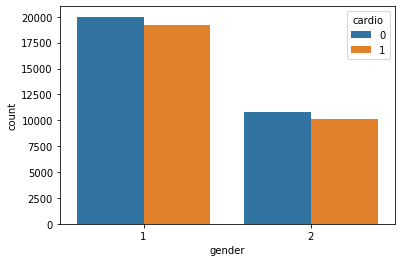

In [20]:
sns.countplot(x='gender', hue='cardio', data=df)
plt.show()


### 2.Cholestrol 

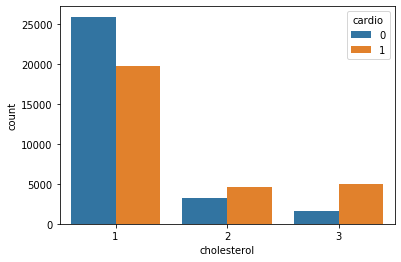

In [21]:
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.show()

### 3. Glucose

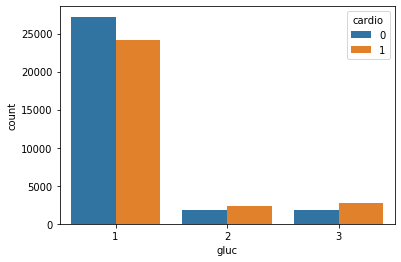

In [22]:
sns.countplot(x='gluc', hue='cardio', data=df)
plt.show()


# Heat Map 

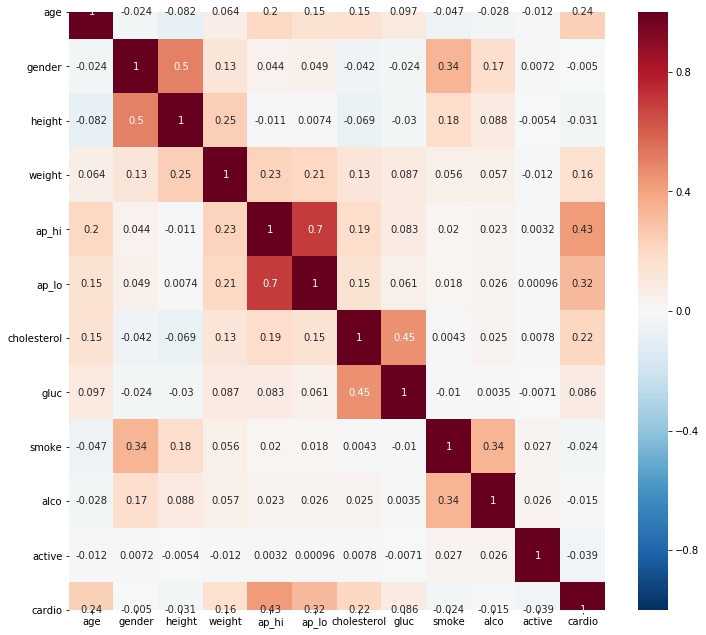

In [23]:
correlation = df.corr()

plt.figure(figsize=(12, 11))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")


## Observations:

We can observe from above heat map ap_hi and ap_lo attributes are more important features 
 (or)
We can say that these 2 features influences the presence of cardiovascular disease.

## Data Preparation for Training and Testing Model  

#### 1.First, we will split our 'cardio_train' dataset into x (features) and y (Target variable) components.


In [24]:
x = df.drop(['cardio'], axis=1, inplace=False) ### Only features excluding id and cardio(target variable)
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.357290,2,168,62.0,110,80,1,1,0,0,1
1,55.381246,1,156,85.0,140,90,3,1,0,0,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0
3,48.249144,2,169,82.0,150,100,1,1,0,0,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0


In [25]:
y=df['cardio']  ## Target Variable (Binary )
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

#### 2.Second,we will split the data into Train and Test datasets.Here we are splitting in 80:20 (i.e, Train : Test ).

In [26]:
# Splitting the data into training & testing datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.20,random_state =5)


print('length of X :',len(x))
print('x_train :',len(x_train),',y_train :',len(y_train),',x_test :',len(x_test),',y_test :',len(y_test))

length of X : 60108
x_train : 48086 ,y_train : 48086 ,x_test : 12022 ,y_test : 12022


In [27]:
x_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
46106,54.414784,2,180,78.0,110,70,1,1,0,0,1
16290,48.021903,2,174,88.0,130,90,1,1,0,0,0
63145,55.728953,1,160,80.0,120,80,1,1,0,0,1
38450,55.854894,2,170,85.0,120,80,1,1,0,0,1
63787,39.452430,2,168,65.0,140,90,1,1,0,1,1


In [28]:
y_train.head(5)

46106    0
16290    1
63145    0
38450    0
63787    1
Name: cardio, dtype: int64

In [29]:
x_test.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
9874,53.796030,1,166,80.0,125,80,1,1,0,0,1
33418,53.894593,1,156,95.0,130,80,1,1,0,0,1
65418,55.446954,1,164,76.0,130,80,3,1,0,0,1
66378,41.601643,1,167,76.0,100,70,1,3,0,0,1
23054,40.292950,1,172,84.0,120,80,1,1,0,0,1


In [30]:
y_test.head(5)

9874     1
33418    0
65418    1
66378    0
23054    1
Name: cardio, dtype: int64

## Models

## 1.KNearestNeighbours

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [32]:
y_predicted_knn = knn.predict(x_test) ## Giving test dataset for the model to predict target variables

In [33]:
y_predicted_knn[:10] 

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [34]:
Accuracy = (knn.score(x_test,y_test))*100
Accuracy

71.23606721011478

### K Fold Cross Validation 

In [35]:
from sklearn.model_selection import cross_val_score

accuracies_knn = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=5)
print(accuracies_knn)

[0.71782075 0.71737548 0.71155246 0.71633566 0.70936883]


# 2.Support Vector Machine (SVM) predictor


In [36]:
from sklearn.svm import SVC


In [37]:
model = SVC(gamma='auto') 


In [38]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
y_pred_svc = model.predict(x_test)

In [40]:
Accuracy_SVM = (model.score(x_test, y_test))*100
Accuracy_SVM


70.22126102146066

# 3.Naive Bayes Classifier

In [41]:
from sklearn.naive_bayes import GaussianNB


In [42]:
model = GaussianNB()

In [43]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
y_pred = model.predict(x_test)

In [45]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

### Import scikit-learn metrics module for accuracy calculation

In [46]:

from sklearn import metrics


### Model Accuracy, how often is the NB classifier correct?


In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 70.80352686740974


# 4.Deep Forest 

In [48]:
class gcForest(object):

    def __init__(self, shape_1X=None, n_mgsRFtree=30, window=None, stride=1,
                 cascade_test_size=0.2, n_cascadeRF=2, n_cascadeRFtree=101, cascade_layer=np.inf,
                 min_samples_mgs=0.1, min_samples_cascade=0.05, tolerance=0.0, n_jobs=1):
        """ gcForest Classifier.
        :param shape_1X: int or tuple list or np.array (default=None)
            Shape of a single sample element [n_lines, n_cols]. Required when calling mg_scanning!
            For sequence data a single int can be given.
        :param n_mgsRFtree: int (default=30)
            Number of trees in a Random Forest during Multi Grain Scanning.
        :param window: int (default=None)
            List of window sizes to use during Multi Grain Scanning.
            If 'None' no slicing will be done.
        :param stride: int (default=1)
            Step used when slicing the data.
        :param cascade_test_size: float or int (default=0.2)
            Split fraction or absolute number for cascade training set splitting.
        :param n_cascadeRF: int (default=2)
            Number of Random Forests in a cascade layer.
            For each pseudo Random Forest a complete Random Forest is created, hence
            the total numbe of Random Forests in a layer will be 2*n_cascadeRF.
        :param n_cascadeRFtree: int (default=101)
            Number of trees in a single Random Forest in a cascade layer.
        :param min_samples_mgs: float or int (default=0.1)
            Minimum number of samples in a node to perform a split
            during the training of Multi-Grain Scanning Random Forest.
            If int number_of_samples = int.
            If float, min_samples represents the fraction of the initial n_samples to consider.
        :param min_samples_cascade: float or int (default=0.1)
            Minimum number of samples in a node to perform a split
            during the training of Cascade Random Forest.
            If int number_of_samples = int.
            If float, min_samples represents the fraction of the initial n_samples to consider.
        :param cascade_layer: int (default=np.inf)
            mMximum number of cascade layers allowed.
            Useful to limit the contruction of the cascade.
        :param tolerance: float (default=0.0)
            Accuracy tolerance for the casacade growth.
            If the improvement in accuracy is not better than the tolerance the construction is
            stopped.
        :param n_jobs: int (default=1)
            The number of jobs to run in parallel for any Random Forest fit and predict.
            If -1, then the number of jobs is set to the number of cores.
        """
        setattr(self, 'shape_1X', shape_1X)
        setattr(self, 'n_layer', 0)
        setattr(self, '_n_samples', 0)
        setattr(self, 'n_cascadeRF', int(n_cascadeRF))
        if isinstance(window, int):
            setattr(self, 'window', [window])
        elif isinstance(window, list):
            setattr(self, 'window', window)
        setattr(self, 'stride', stride)
        setattr(self, 'cascade_test_size', cascade_test_size)
        setattr(self, 'n_mgsRFtree', int(n_mgsRFtree))
        setattr(self, 'n_cascadeRFtree', int(n_cascadeRFtree))
        setattr(self, 'cascade_layer', cascade_layer)
        setattr(self, 'min_samples_mgs', min_samples_mgs)
        setattr(self, 'min_samples_cascade', min_samples_cascade)
        setattr(self, 'tolerance', tolerance)
        setattr(self, 'n_jobs', n_jobs)

    def fit(self, X, y):
        """ Training the gcForest on input data X and associated target y.
        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.
        :param y: np.array
            1D array containing the target values.
            Must be of shape [n_samples]
        """
        if np.shape(X)[0] != len(y):
            raise ValueError('Sizes of y and X do not match.')

        mgs_X = self.mg_scanning(X, y)
        _ = self.cascade_forest(mgs_X, y)

    def predict_proba(self, X):
        """ Predict the class probabilities of unknown samples X.
        :param X: np.array
            Array containing the input samples.
            Must be of the same shape [n_samples, data] as the training inputs.
        :return: np.array
            1D array containing the predicted class probabilities for each input sample.
        """
        mgs_X = self.mg_scanning(X)
        cascade_all_pred_prob = self.cascade_forest(mgs_X)
        predict_proba = np.mean(cascade_all_pred_prob, axis=0)

        return predict_proba

    def predict(self, X):
        """ Predict the class of unknown samples X.
        :param X: np.array
            Array containing the input samples.
            Must be of the same shape [n_samples, data] as the training inputs.
        :return: np.array
            1D array containing the predicted class for each input sample.
        """
        pred_proba = self.predict_proba(X=X)
        predictions = np.argmax(pred_proba, axis=1)

        return predictions

    def mg_scanning(self, X, y=None):
        """ Performs a Multi Grain Scanning on input data.
        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.
        :param y: np.array (default=None)
        :return: np.array
            Array of shape [n_samples, .. ] containing Multi Grain Scanning sliced data.
        """
        setattr(self, '_n_samples', np.shape(X)[0])
        shape_1X = getattr(self, 'shape_1X')
        if isinstance(shape_1X, int):
            shape_1X = [1,shape_1X]
        if not getattr(self, 'window'):
            setattr(self, 'window', [shape_1X[1]])

        mgs_pred_prob = []

        for wdw_size in getattr(self, 'window'):
            wdw_pred_prob = self.window_slicing_pred_prob(X, wdw_size, shape_1X, y=y)
            mgs_pred_prob.append(wdw_pred_prob)

        return np.concatenate(mgs_pred_prob, axis=1)

    def window_slicing_pred_prob(self, X, window, shape_1X, y=None):
        """ Performs a window slicing of the input data and send them through Random Forests.
        If target values 'y' are provided sliced data are then used to train the Random Forests.
        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.
        :param window: int
            Size of the window to use for slicing.
        :param shape_1X: list or np.array
            Shape of a single sample.
        :param y: np.array (default=None)
            Target values. If 'None' no training is done.
        :return: np.array
            Array of size [n_samples, ..] containing the Random Forest.
            prediction probability for each input sample.
        """
        n_tree = getattr(self, 'n_mgsRFtree')
        min_samples = getattr(self, 'min_samples_mgs')
        stride = getattr(self, 'stride')

        if shape_1X[0] > 1:
            print('Slicing Images...')
            sliced_X, sliced_y = self._window_slicing_img(X, window, shape_1X, y=y, stride=stride)
        else:
            print('Slicing Sequence...')
            sliced_X, sliced_y = self._window_slicing_sequence(X, window, shape_1X, y=y, stride=stride)

        if y is not None:
            n_jobs = getattr(self, 'n_jobs')
            prf = RandomForestClassifier(n_estimators=n_tree, max_features='sqrt',
                                         min_samples_split=min_samples, oob_score=True, n_jobs=n_jobs)
            crf = RandomForestClassifier(n_estimators=n_tree, max_features=1,
                                         min_samples_split=min_samples, oob_score=True, n_jobs=n_jobs)
            print('Training MGS Random Forests...')
            prf.fit(sliced_X, sliced_y)
            crf.fit(sliced_X, sliced_y)
            setattr(self, '_mgsprf_{}'.format(window), prf)
            setattr(self, '_mgscrf_{}'.format(window), crf)
            pred_prob_prf = prf.oob_decision_function_
            pred_prob_crf = crf.oob_decision_function_

        if hasattr(self, '_mgsprf_{}'.format(window)) and y is None:
            prf = getattr(self, '_mgsprf_{}'.format(window))
            crf = getattr(self, '_mgscrf_{}'.format(window))
            pred_prob_prf = prf.predict_proba(sliced_X)
            pred_prob_crf = crf.predict_proba(sliced_X)

        pred_prob = np.c_[pred_prob_prf, pred_prob_crf]

        return pred_prob.reshape([getattr(self, '_n_samples'), -1])

    def _window_slicing_img(self, X, window, shape_1X, y=None, stride=1):
        """ Slicing procedure for images
        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.
        :param window: int
            Size of the window to use for slicing.
        :param shape_1X: list or np.array
            Shape of a single sample [n_lines, n_cols].
        :param y: np.array (default=None)
            Target values.
        :param stride: int (default=1)
            Step used when slicing the data.
        :return: np.array and np.array
            Arrays containing the sliced images and target values (empty if 'y' is None).
        """
        if any(s < window for s in shape_1X):
            raise ValueError('window must be smaller than both dimensions for an image')

        len_iter_x = np.floor_divide((shape_1X[1] - window), stride) + 1
        len_iter_y = np.floor_divide((shape_1X[0] - window), stride) + 1
        iterx_array = np.arange(0, stride*len_iter_x, stride)
        itery_array = np.arange(0, stride*len_iter_y, stride)

        ref_row = np.arange(0, window)
        ref_ind = np.ravel([ref_row + shape_1X[1] * i for i in range(window)])
        inds_to_take = [ref_ind + ix + shape_1X[1] * iy
                        for ix, iy in itertools.product(iterx_array, itery_array)]

        sliced_imgs = np.take(X, inds_to_take, axis=1).reshape(-1, window**2)

        if y is not None:
            sliced_target = np.repeat(y, len_iter_x * len_iter_y)
        elif y is None:
            sliced_target = None

        return sliced_imgs, sliced_target

    def _window_slicing_sequence(self, X, window, shape_1X, y=None, stride=1):
        """ Slicing procedure for sequences (aka shape_1X = [.., 1]).
        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.
        :param window: int
            Size of the window to use for slicing.
        :param shape_1X: list or np.array
            Shape of a single sample [n_lines, n_col].
        :param y: np.array (default=None)
            Target values.
        :param stride: int (default=1)
            Step used when slicing the data.
        :return: np.array and np.array
            Arrays containing the sliced sequences and target values (empty if 'y' is None).
        """
        if shape_1X[1] < window:
            raise ValueError('window must be smaller than the sequence dimension')

        len_iter = np.floor_divide((shape_1X[1] - window), stride) + 1
        iter_array = np.arange(0, stride*len_iter, stride)

        ind_1X = np.arange(np.prod(shape_1X))
        inds_to_take = [ind_1X[i:i+window] for i in iter_array]
        sliced_sqce = np.take(X, inds_to_take, axis=1).reshape(-1, window)

        if y is not None:
            sliced_target = np.repeat(y, len_iter)
        elif y is None:
            sliced_target = None

        return sliced_sqce, sliced_target

    def cascade_forest(self, X, y=None):
        """ Perform (or train if 'y' is not None) a cascade forest estimator.
        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.
        :param y: np.array (default=None)
            Target values. If 'None' perform training.
        :return: np.array
            1D array containing the predicted class for each input sample.
        """
        if y is not None:
            setattr(self, 'n_layer', 0)
            test_size = getattr(self, 'cascade_test_size')
            max_layers = getattr(self, 'cascade_layer')
            tol = getattr(self, 'tolerance')

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

            self.n_layer += 1
            prf_crf_pred_ref = self._cascade_layer(X_train, y_train)
            accuracy_ref = self._cascade_evaluation(X_test, y_test)
            feat_arr = self._create_feat_arr(X_train, prf_crf_pred_ref)

            self.n_layer += 1
            prf_crf_pred_layer = self._cascade_layer(feat_arr, y_train)
            accuracy_layer = self._cascade_evaluation(X_test, y_test)

            while accuracy_layer > (accuracy_ref + tol) and self.n_layer <= max_layers:
                accuracy_ref = accuracy_layer
                prf_crf_pred_ref = prf_crf_pred_layer
                feat_arr = self._create_feat_arr(X_train, prf_crf_pred_ref)
                self.n_layer += 1
                prf_crf_pred_layer = self._cascade_layer(feat_arr, y_train)
                accuracy_layer = self._cascade_evaluation(X_test, y_test)

            if accuracy_layer < accuracy_ref :
                n_cascadeRF = getattr(self, 'n_cascadeRF')
                for irf in range(n_cascadeRF):
                    delattr(self, '_casprf{}_{}'.format(self.n_layer, irf))
                    delattr(self, '_cascrf{}_{}'.format(self.n_layer, irf))
                self.n_layer -= 1

        elif y is None:
            at_layer = 1
            prf_crf_pred_ref = self._cascade_layer(X, layer=at_layer)
            while at_layer < getattr(self, 'n_layer'):
                at_layer += 1
                feat_arr = self._create_feat_arr(X, prf_crf_pred_ref)
                prf_crf_pred_ref = self._cascade_layer(feat_arr, layer=at_layer)

        return prf_crf_pred_ref

    def _cascade_layer(self, X, y=None, layer=0):
        """ Cascade layer containing Random Forest estimators.
        If y is not None the layer is trained.
        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.
        :param y: np.array (default=None)
            Target values. If 'None' perform training.
        :param layer: int (default=0)
            Layer indice. Used to call the previously trained layer.
        :return: list
            List containing the prediction probabilities for all samples.
        """
        n_tree = getattr(self, 'n_cascadeRFtree')
        n_cascadeRF = getattr(self, 'n_cascadeRF')
        min_samples = getattr(self, 'min_samples_cascade')

        n_jobs = getattr(self, 'n_jobs')
        prf = RandomForestClassifier(n_estimators=n_tree, max_features='sqrt',
                                     min_samples_split=min_samples, oob_score=True, n_jobs=n_jobs)
        crf = RandomForestClassifier(n_estimators=n_tree, max_features=1,
                                     min_samples_split=min_samples, oob_score=True, n_jobs=n_jobs)

        prf_crf_pred = []
        if y is not None:
            print('Adding/Training Layer, n_layer={}'.format(self.n_layer))
            for irf in range(n_cascadeRF):
                prf.fit(X, y)
                crf.fit(X, y)
                setattr(self, '_casprf{}_{}'.format(self.n_layer, irf), prf)
                setattr(self, '_cascrf{}_{}'.format(self.n_layer, irf), crf)
                prf_crf_pred.append(prf.oob_decision_function_)
                prf_crf_pred.append(crf.oob_decision_function_)
        elif y is None:
            for irf in range(n_cascadeRF):
                prf = getattr(self, '_casprf{}_{}'.format(layer, irf))
                crf = getattr(self, '_cascrf{}_{}'.format(layer, irf))
                prf_crf_pred.append(prf.predict_proba(X))
                prf_crf_pred.append(crf.predict_proba(X))

        return prf_crf_pred

    def _cascade_evaluation(self, X_test, y_test):
        """ Evaluate the accuracy of the cascade using X and y.
        :param X_test: np.array
            Array containing the test input samples.
            Must be of the same shape as training data.
        :param y_test: np.array
            Test target values.
        :return: float
            the cascade accuracy.
        """
        casc_pred_prob = np.mean(self.cascade_forest(X_test), axis=0)
        casc_pred = np.argmax(casc_pred_prob, axis=1)
        casc_accuracy = accuracy_score(y_true=y_test, y_pred=casc_pred)
        print('Layer validation accuracy = {}'.format(casc_accuracy))

        return casc_accuracy

    def _create_feat_arr(self, X, prf_crf_pred):
        """ Concatenate the original feature vector with the predicition probabilities
        of a cascade layer.
        :param X: np.array
            Array containing the input samples.
            Must be of shape [n_samples, data] where data is a 1D array.
        :param prf_crf_pred: list
            Prediction probabilities by a cascade layer for X.
        :return: np.array
            Concatenation of X and the predicted probabilities.
            To be used for the next layer in a cascade forest.
        """
        swap_pred = np.swapaxes(prf_crf_pred, 0, 1)
        add_feat = swap_pred.reshape([np.shape(X)[0], -1])
        feat_arr = np.concatenate([add_feat, X], axis=1)

        return feat_arr

### Train Cascade Forest

In [49]:
gcf = gcForest(n_cascadeRF=2,n_cascadeRFtree=500) #Default values tolerance =0.0 ,n_cascadeRFtree=101
_ = gcf.cascade_forest(x_train, y_train)

Adding/Training Layer, n_layer=1
Layer validation accuracy = 0.7271782075275525
Adding/Training Layer, n_layer=2
Layer validation accuracy = 0.7313370763152423
Adding/Training Layer, n_layer=3
Layer validation accuracy = 0.730817217716781



Note that the cascade forest module does not directly return predictions but probability predictions 
from each Random Forest in the last layer of the cascade.Hence the need to first take the mean of the output and
then find the max.


### Predict the test data

In [50]:

pred_proba = gcf.cascade_forest(x_test)


In [51]:

print(pred_proba [:1])

[array([[0.6850151 , 0.3149849 ],
       [0.48903201, 0.51096799],
       [0.21796914, 0.78203086],
       ...,
       [0.47106423, 0.52893577],
       [0.56334503, 0.43665497],
       [0.63622772, 0.36377228]])]


In [52]:
tmp = np.mean(pred_proba, axis=0)


In [53]:
tmp[:5]

array([[0.68898842, 0.31101158],
       [0.46188381, 0.53811619],
       [0.21937038, 0.78062962],
       [0.76234871, 0.23765129],
       [0.80481166, 0.19518834]])

In [54]:
preds = np.argmax(tmp, axis=1)

In [55]:
preds[5:10]

array([0, 1, 0, 1, 1], dtype=int64)

In [56]:
y_test[5:10]

23830    0
47635    1
14742    1
22775    1
2181     1
Name: cardio, dtype: int64

In [57]:
print("Accuracy of Cascaded Random Forest is :{}".format(accuracy_score(y_true=y_test,y_pred=preds)*100))

Accuracy of Cascaded Random Forest is :72.45050740309432
